<a href="https://colab.research.google.com/github/Dany511/Code/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Lets Explore the Data

In [1]:
# Import neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the data and check the first five rows
data=pd.read_csv("/content/Hotel Bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# There are 119390 records in our dataset
data.shape

(119390, 32)

In [4]:
# Check the different datatypes of columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Descrptive Statistics of Data
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# List of columns in the dataset
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Cleaning Data

In [7]:
# Check whether there are any NULL values present in dataset
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### The columns Agent, Company ,Country and Children contains NULL values

In [8]:
# Drop Unneccesary columns and Columns which contains high number of Null values

In [9]:
# These are the columns filtered for the Analysis
Selected_columns=['hotel', 'is_canceled', 'lead_time', 'arrival_date_year','arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal','country', 'market_segment', 'distribution_channel','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type','deposit_type','customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests',
       ]

In [10]:
# Create Copy of the dataset with Selected_columns
df=data[Selected_columns].copy()

# EDA

## Correlation Heat Map

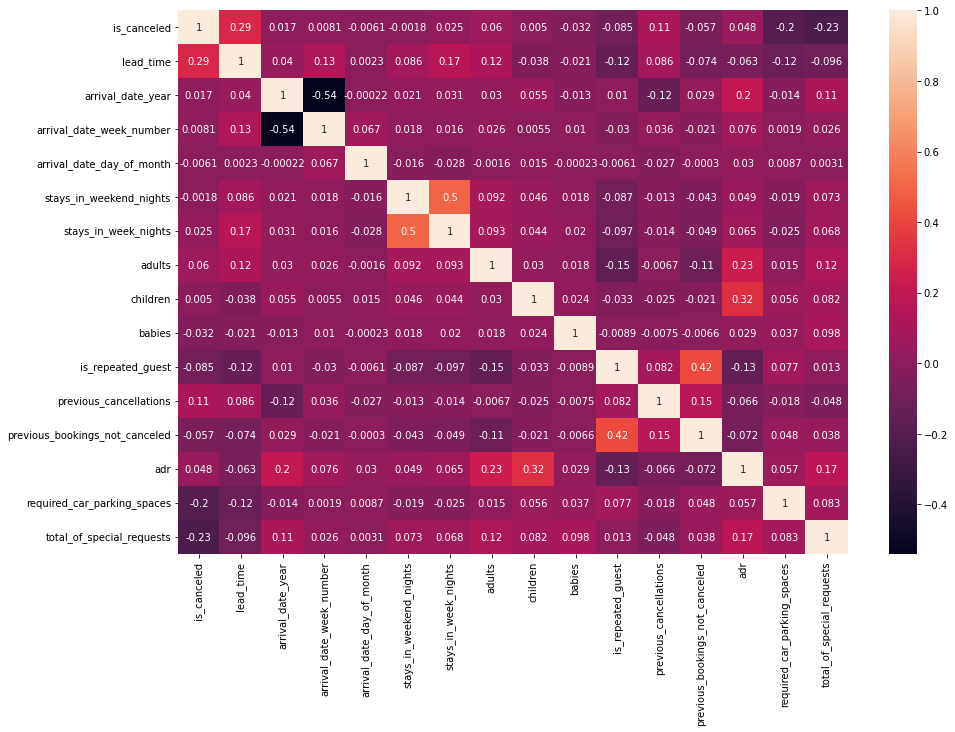

In [11]:
# Plot Correlation heat map to visualize the relationship between the variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### • There is small positive correlation of 32% between adr and children
### • There is positive correlation of 42% between between 'is_repeated' and previous_bookings_not_canceled
### • There is small positive correlation of 29% between lead_time and is_canceled
### • There is positive correlation of 50% between between 'stays_in_weekend_nights' and 'stays_in_week_nights







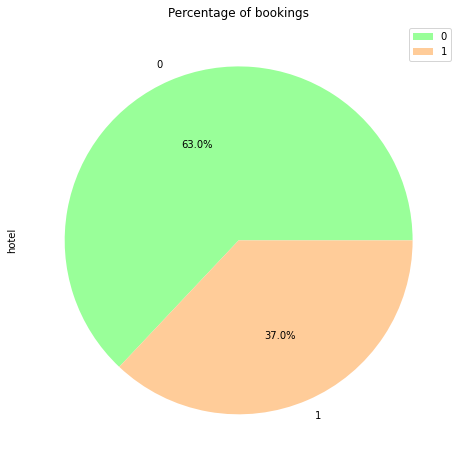

In [12]:
# Confirmed and Canceled bookings 
df.groupby(['is_canceled']).count().plot(kind='pie',y='hotel',autopct='%0.1f%%',title='Percentage of bookings',figsize=(12,8),colors=['#99ff99','#ffcc99'])

### • Out of all the bookings 37% of bookings are Canceled

## Analysis by Hotel Type

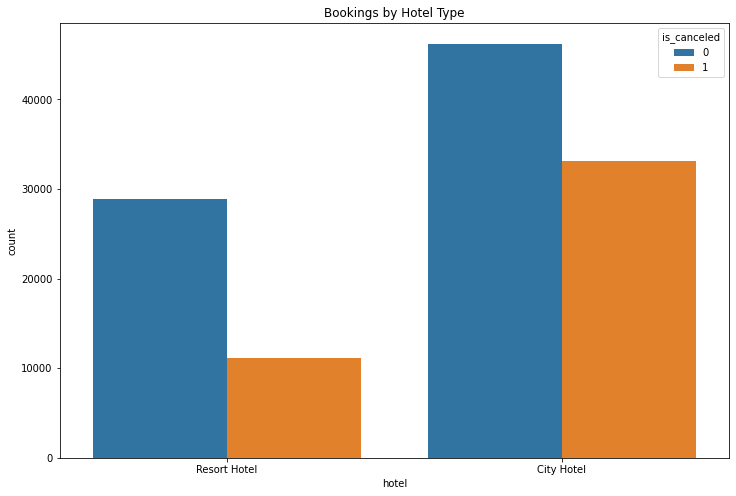

In [13]:
# Count of Bookings by hotel type
plt.figure(figsize=(12,8))
plt.title('Bookings by Hotel Type')
sns.countplot(x='hotel',hue='is_canceled',data=data)

In [14]:
# Fraction of bookings per hotel type
data['hotel'].value_counts(normalize=True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

In [15]:
# Divide the bookings data with respect to hotel type
df_r=data[data['hotel']=='Resort Hotel']
df_c=data[data['hotel']=='City Hotel']

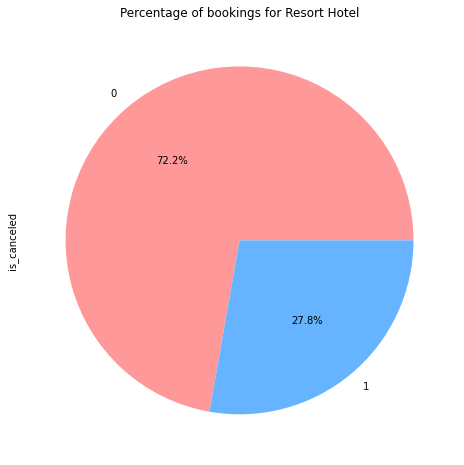

In [16]:
# Plot of Bookings for Resort Hotel
colors=['#ff9999','#66b3ff']
df_r['is_canceled'].value_counts(normalize=True).plot(kind='pie',y='hotel',autopct='%0.1f%%',title='Percentage of bookings for Resort Hotel',figsize=(12,8),colors=colors)

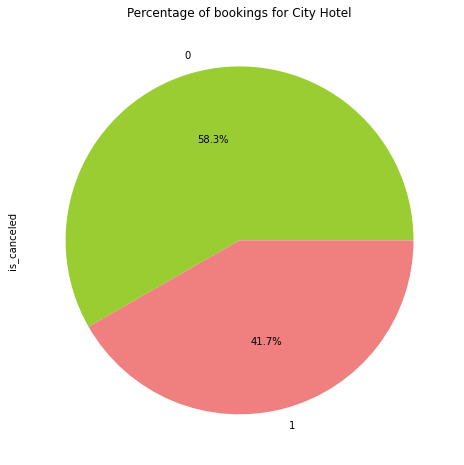

In [17]:
# Plot of Bookings for City hotel
colors = ['yellowgreen', 'lightcoral']
df_c['is_canceled'].value_counts(normalize=True).plot(kind='pie',y='hotel',autopct='%0.1f%%',title='Percentage of bookings for City Hotel',figsize=(12,8),colors=colors)

## • Most of the bookings were from city hotel which is about 66%
## • Cancellations in City hotel are more when compared to Resort hotel 

## Lets Analyse the Confirmed_bookings

In [18]:
# Create a DataFrame for Confirmed Bookings
bookings_confirmed=df[df['is_canceled']==0]

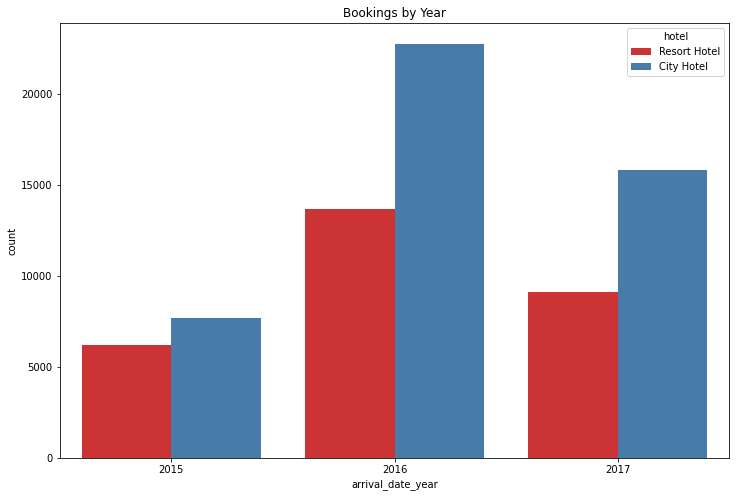

In [19]:
# Plot od Yearly Bookings
plt.figure(figsize=(12,8))
plt.title('Bookings by Year')
sns.countplot(x='arrival_date_year',data=bookings_confirmed,hue='hotel',palette='Set1')

## Number of Bookings for City Hotel is more when compared to Resort Hotel over the years and do not increase constantly over the years

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


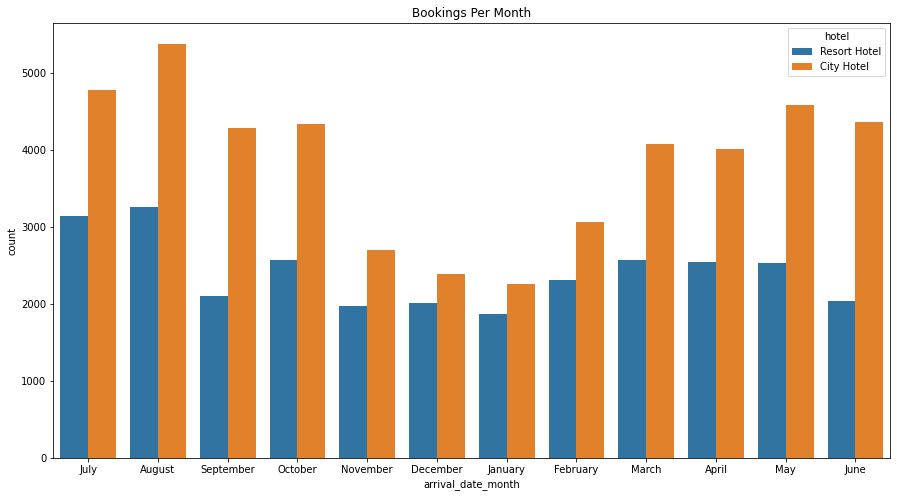

In [20]:
# Plot of Monthly bookings
plt.figure(figsize=(15,8))
plt.title('Bookings Per Month')
sns.countplot('arrival_date_month',data=bookings_confirmed,hue='hotel')

In [21]:
data['arrival_date_month'].value_counts(normalize=True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


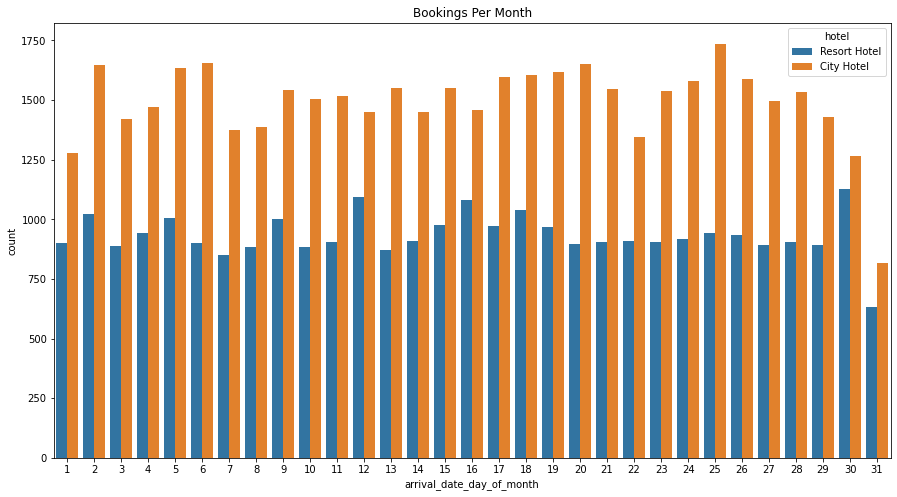

In [22]:
# Plot of Day wise bookings
plt.figure(figsize=(15,8))
plt.title('Bookings Per Month')
sns.countplot('arrival_date_day_of_month',data=bookings_confirmed,hue='hotel')

## • Most of the bookings are from May , June ,July and August 
## • August is the busiest month of the year 
## • Bookings are low for November ,December and January
## • Bookings are low at the month ends

# Analyze bookings Country wise

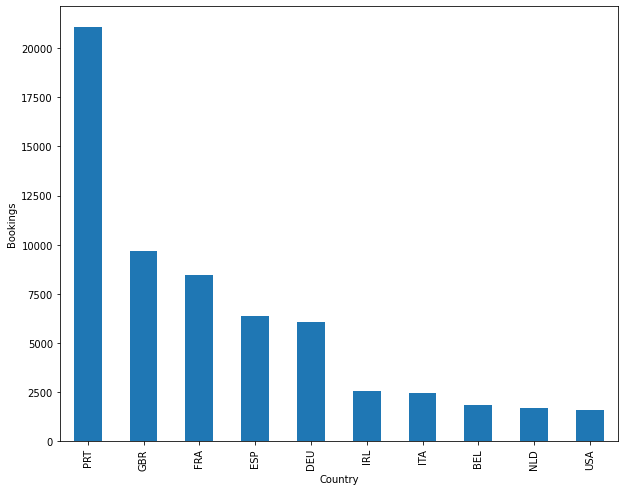

In [23]:
# Number of Bookings by Country
s=bookings_confirmed['country'].value_counts().head(10)
s.plot(kind='bar',figsize=(10,8))
plt.xlabel('Country')
plt.ylabel('Bookings')
plt.show()

In [24]:
data['country'].value_counts(normalize=True).head(10)

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
Name: country, dtype: float64

### • Most of the bookings are from Portugal with 40% of the total bookings followed by Great Britain(10%) and France (8%)

# Now Lets Analyze Canceled Booking data

In [25]:
# Create Data frame for Canceled bookings
df1=data[data['is_canceled']==1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


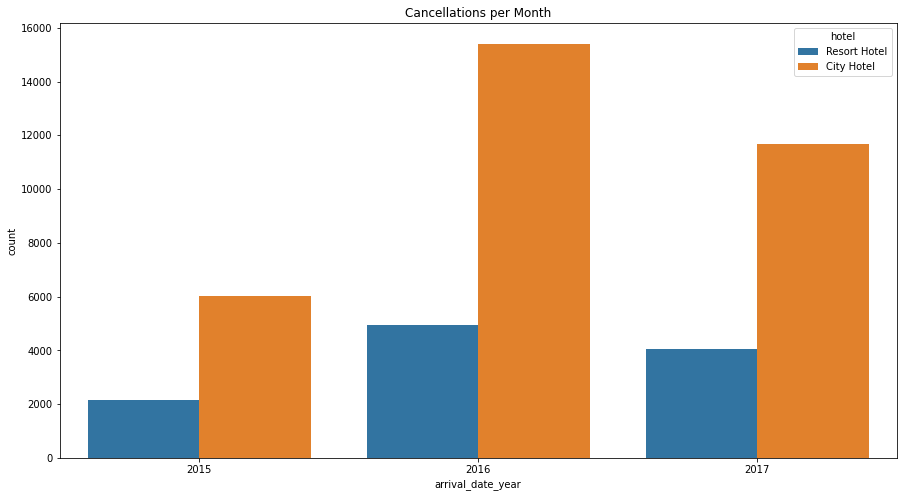

In [26]:
# Canceled Bookings per year
plt.figure(figsize=(15,8))
plt.title('Cancellations per Month')
sns.countplot('arrival_date_year',data=df1,hue='hotel')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


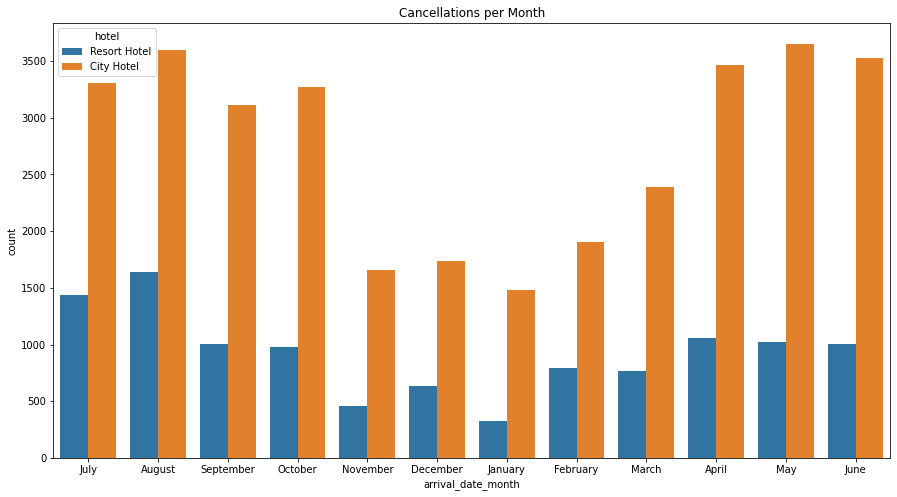

In [27]:
# Canceled bookings per Month
plt.figure(figsize=(15,8))
plt.title('Cancellations per Month')
sns.countplot('arrival_date_month',data=df1,hue='hotel')

In [28]:
df1.groupby('arrival_date_month')['is_canceled'].count().sort_values(ascending=False)

arrival_date_month
August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: is_canceled, dtype: int64

### • Cancellation are  more in August , july , May and June . May be because of more  number of bookings 

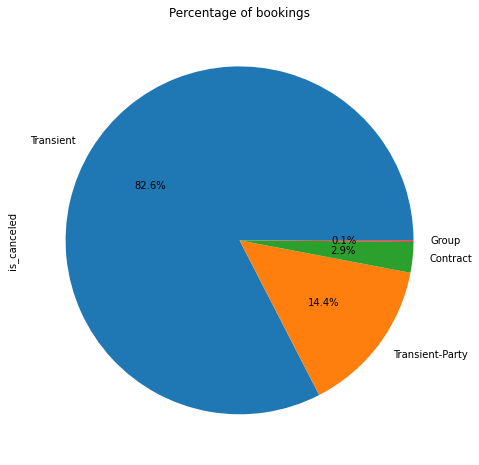

In [29]:
df1.groupby('customer_type')['is_canceled'].count().sort_values(ascending=False).plot(kind='pie',y='hotel',autopct='%0.1f%%',title='Percentage of bookings',figsize=(12,8))

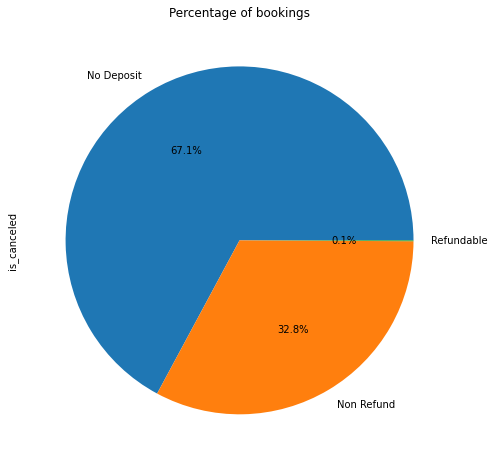

In [30]:
df1.groupby('deposit_type')['is_canceled'].count().sort_values(ascending=False).plot(kind='pie',y='hotel',autopct='%0.1f%%',title='Percentage of bookings',figsize=(12,8))

### • Most of the Cancellations are from Transient type customers(83%) 
### • No Deposit Bookings have the most number of cancellations

# Lets visualise how the ADR (Average Daily Rate) change over the year

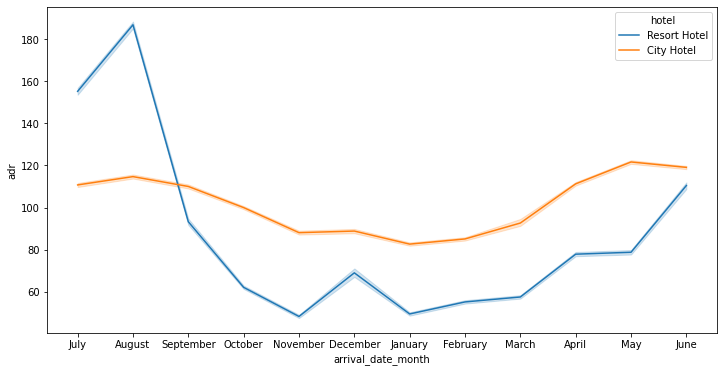

In [31]:
# Plot ADR per Month for both hotel types
plt.figure(figsize=(12,6))
sns.lineplot(data=data,x='arrival_date_month',y='adr',hue='hotel')

### • Adr is highest in August for Resort hotel and highest for city hotel in May
### • Prices of city hotel do not fluctuate much

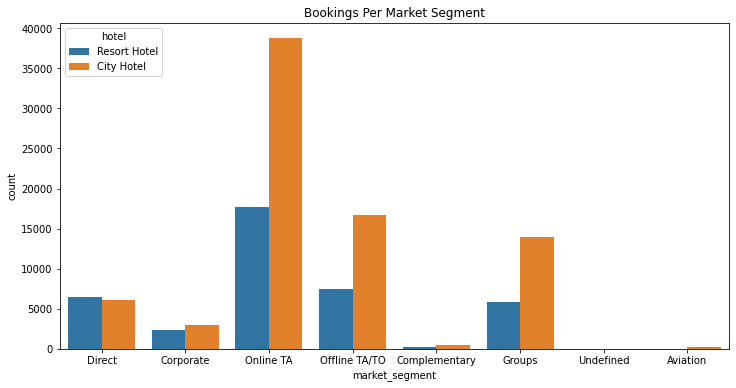

In [32]:
# Bookings by Market segment
plt.figure(figsize=(12,6))
plt.title('Bookings Per Market Segment')
sns.countplot(x='market_segment',hue='hotel',data=data)

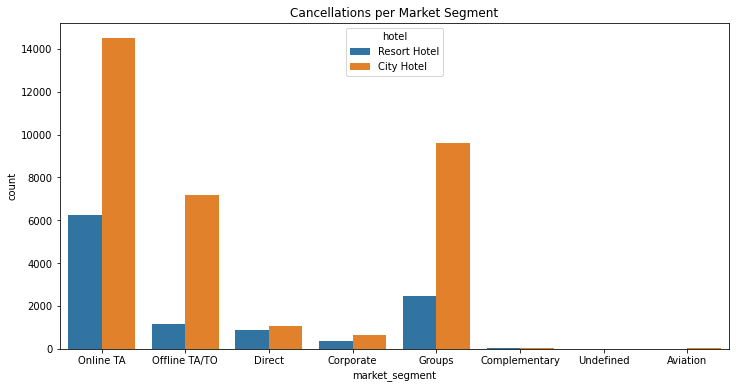

In [33]:
# Cancellation per Market Segment
plt.figure(figsize=(12,6))
plt.title('Cancellations per Market Segment')
sns.countplot(x='market_segment',data=df1,hue='hotel')

In [34]:
data['market_segment'].value_counts(normalize=True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

In [35]:
data['distribution_channel'].value_counts(normalize=True)

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

In [36]:
df1['distribution_channel'].value_counts(normalize=True)

TA/TO        0.907923
Direct       0.057819
Corporate    0.033330
GDS          0.000837
Undefined    0.000090
Name: distribution_channel, dtype: float64

In [37]:
data['reserved_room_type'].value_counts(normalize=True)

A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


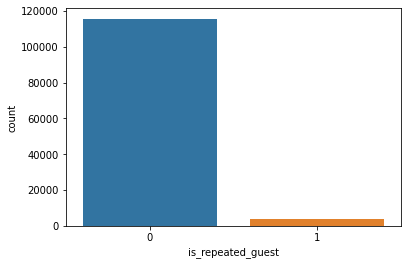

In [38]:
sns.countplot('is_repeated_guest',data=data)

In [39]:
data.groupby(['children','babies'])[['total_of_special_requests']].sum().sort_values(by='total_of_special_requests')

total_of_special_requests
children babies                           
0.0      9                               0
         10                              1
10.0     0                               1
1.0      2                               8
0.0      2                              20
2.0      1                              31
3.0      0                              69
1.0      1                             218
0.0      1                            1130
2.0      0                            2487
1.0      0                            4691
0.0      0                           59554

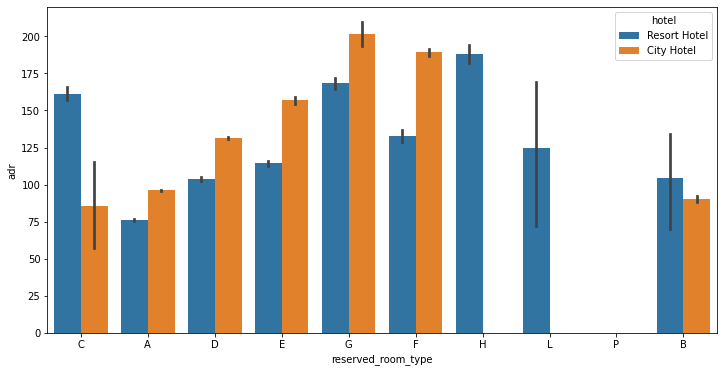

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(y='adr',x='reserved_room_type',hue='hotel',data=data)

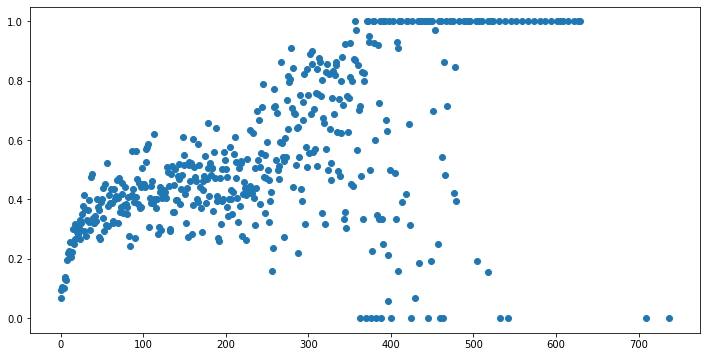

In [41]:
a=data.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(12,6))
plt.scatter(a.index,a['mean'])